# base

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
import joblib
import pickle
from sklearn.ensemble import VotingClassifier

In [2]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Users\\NT551XCJ\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\PERB____.TTF',
 'C:\\Windows\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\H2MKPB.TTF',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\SitkaVF.ttf',
 'C:\\Windows\\Fonts\\LTYPEBO.TTF',
 'C:\\Windows\\Fonts\\COOPBL.TTF',
 'C:\\Windows\\Fonts\\NIAGENG.TTF',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\GILI____.TTF',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAI.TTF',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\HTOWERTI.TTF',
 'C

In [3]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
kfold = KFold( n_splits = 5, random_state=1234, shuffle=True)

# 전처리 3분류 오버 샘플링

In [8]:
# csv 불러오기 
path = "전처리 최종 4_10명.csv"
ml_df = pd.read_csv(path, encoding = 'cp949')

In [9]:
# ml_df = ml_df[ml_df['sales'] > 500000000].copy()
def label_sales(num):
    if num >= 10000000000:
        return 0
    elif num >= 3000000000:
        return 1
    else:
        return 2

ml_df['sales_N'] = ml_df['sales'].apply(label_sales)
ml_df = ml_df.replace(999, -999)

columns_to_delete = [
    'Smile_Confidence_',
    'Eyeglasses_Confidence_',
    'Sunglasses_Confidence_',
    'Gender_Confidence_',
    'Beard_Confidence_',
    'Mustache_Confidence_',
    'EyesOpen_Confidence_',
    'MouthOpen_Confidence_',
    'FaceOccluded_Confidence_',
    'EyeDirection_Confidence_',
    'Landmarks_',
    'Confidence_0',
    'Confidence_1',
    'Confidence_2',
    'Confidence_3',
    'Confidence_4',
    'Confidence_5',
    'Confidence_6',
    'Confidence_7',
    'Confidence_8',
    'Confidence_9'
]

columns_to_delete = [col for col in ml_df.columns if any(substring in col for substring in columns_to_delete)]

ml_df.drop(columns=columns_to_delete, inplace=True)

# Genre 라벨링
df = ml_df.copy()
df.drop(columns = ['Movie_name', 'Image_name', 'Movie_type', 'Number_of_moviegoers', 'sales','Genre', 'Running_time', 'Genre_n', 'sales_N'], inplace = True)

y = ml_df.loc[:,'sales_N']

# 훈련 데이터, 평가 데이터, 훈련 데이터 정답, 평가 데이터 정답
X_train, X_val, y_train, y_val = train_test_split(
    df,
    y,
    test_size = 0.2,
    random_state= 1999
)

In [10]:
ml_df.groupby('sales_N').count()

,Movie_name,Image_name,Movie_type,SpecIal,Month,Number_of_moviegoers,sales,Genre,Genre_comedy,Genre_drama,...,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,part_11,part_12
sales_N,,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
1,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
2,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,...,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743


In [11]:
print(y_train.value_counts())

sales_N
2    2186
0     408
1     407
Name: count, dtype: int64


In [12]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Columns: 276 entries, Movie_name to sales_N
dtypes: float64(118), int64(154), object(4)
memory usage: 7.9+ MB


In [13]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((3001, 267), (3001,), (751, 267), (751,))

In [14]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 학습 데이터 오버샘플링
X_train, y_train = smote.fit_resample(X_train, y_train)

# 오버샘플링 후 클래스 분포 확인
print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
sales_N
2    2186
1    2186
0    2186
Name: count, dtype: int64


In [32]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((6558, 267), (6558,), (751, 267), (751,))

# LGBM 모델 돌리기

In [16]:
def lgbc_objective( trail ) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,0.9),
                'reg_alpha': trail.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trail.suggest_uniform('reg_lambda', 0.0, 10.0)
    }

    lgbc = LGBMClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( lgbc,
                         X_train, y_train,
                          cv = kfold, scoring='accuracy')

    acc_mean = scores.mean()

    return acc_mean

In [17]:
lgbc_study = optuna.create_study(direction="maximize")
lgbc_study.optimize(lgbc_objective, n_trials=200, n_jobs=-1 )

[I 2024-05-21 02:48:46,104] A new study created in memory with name: no-name-c7cc6ad4-4560-4430-b7a3-464fca98c471
[I 2024-05-21 02:49:05,319] Trial 6 finished with value: 0.6645333342635485 and parameters: {'n_estimators': 115, 'learning_rate': 0.7166048894207029, 'max_depth': 193, 'min_split_gain': 21.658163027306728, 'subsample': 0.4131824493964257, 'colsample_bytre': 0.25517133048248375, 'reg_alpha': 0.9925278557018926, 'reg_lambda': 4.2716410206952045}. Best is trial 6 with value: 0.6645333342635485.
[I 2024-05-21 02:49:16,330] Trial 5 finished with value: 0.6463877416234116 and parameters: {'n_estimators': 196, 'learning_rate': 0.8741799118842485, 'max_depth': 164, 'min_split_gain': 25.253262306654257, 'subsample': 0.330581759860934, 'colsample_bytre': 0.120992190771302, 'reg_alpha': 0.015518937718871695, 'reg_lambda': 2.6749642691810935}. Best is trial 6 with value: 0.6645333342635485.
[I 2024-05-21 02:49:36,055] Trial 2 finished with value: 0.8359260757939386 and parameters: {'n

In [18]:
print(lgbc_study.best_trial.values)
print(lgbc_study.best_params)

[0.9028664582984502]
{'n_estimators': 974, 'learning_rate': 0.23134540751831925, 'max_depth': 215, 'min_split_gain': 0.004193144952525207, 'subsample': 0.7629929058811403, 'colsample_bytre': 0.14296420761686726, 'reg_alpha': 0.07515271946183277, 'reg_lambda': 5.574076558883271}


In [19]:
opt_lgbc = LGBMClassifier( n_jobs=-1,
                                random_state=1234,
                                 **lgbc_study.best_params)

opt_lgbc.fit(X_train, y_train)
y_pred = opt_lgbc.predict(X_val)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54067
[LightGBM] [Info] Number of data points in the train set: 6558, number of used features: 265
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [20]:
lgbc_accuracy = accuracy_score(y_val, y_pred)
lgbc_precision = precision_score(y_val, y_pred, average='weighted')
lgbc_recall = recall_score(y_val, y_pred, average='weighted')
lgbc_f1 = f1_score(y_val, y_pred, average='weighted')
lgbc_classification = classification_report(y_val, y_pred)

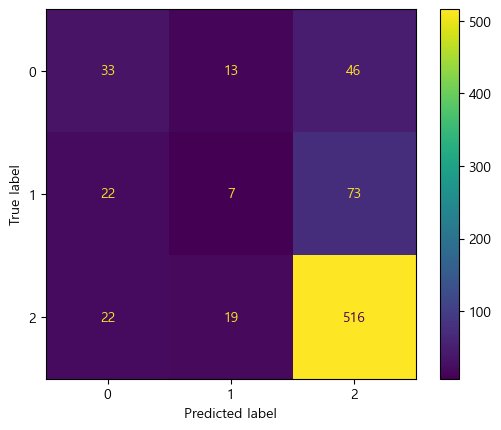

In [21]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_val, y_pred),
                      display_labels=opt_lgbc.classes_).plot()

In [18]:
opt_lgbc.feature_importances_
d = pd.DataFrame( data = opt_lgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

,0,col_name
29,393,Color4
31,386,Color5
25,334,Color2
254,324,title_rate
27,324,Color3
253,286,text_rate
26,268,Color2_ratio
23,247,Color1
32,247,Color5_ratio
28,233,Color3_ratio


# XGboost

In [24]:
def xgbc_objective( trail ) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,0.9),
        'reg_alpha': trail.suggest_uniform('alpha', 0.0, 1.0),
        'reg_lambda': trail.suggest_uniform('lambda', 0.0, 10.0)
    }

    xgbc = XGBClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( xgbc,
                         X_train, y_train,
                          cv = kfold, scoring="accuracy")

    acc_mean = scores.mean()

    return acc_mean

In [25]:
xgbc_study = optuna.create_study(direction="maximize")
xgbc_study.optimize(xgbc_objective, n_trials=100, n_jobs=-1 )

[I 2024-05-21 03:42:46,745] A new study created in memory with name: no-name-b860c9f8-bba7-4c31-aaf7-390f7b52def5
[I 2024-05-21 03:54:20,472] Trial 5 finished with value: 0.8993612909527263 and parameters: {'n_estimators': 153, 'learning_rate': 0.35087878423504987, 'max_depth': 172, 'min_split_gain': 20.68751399442565, 'subsample': 0.7019485544165678, 'colsample_bytre': 0.8719563154008181, 'alpha': 0.6717215940083433, 'lambda': 5.845614169018193}. Best is trial 5 with value: 0.8993612909527263.
[I 2024-05-21 03:56:09,941] Trial 7 finished with value: 0.8781643597328422 and parameters: {'n_estimators': 550, 'learning_rate': 0.7566977620600198, 'max_depth': 232, 'min_split_gain': 28.274983919690072, 'subsample': 0.33595467436725934, 'colsample_bytre': 0.1212997164205552, 'alpha': 0.627233237803208, 'lambda': 1.0902086220554186}. Best is trial 5 with value: 0.8993612909527263.
[I 2024-05-21 04:00:15,953] Trial 2 finished with value: 0.894937768599654 and parameters: {'n_estimators': 661, 

In [26]:
print(xgbc_study.best_trial.values)
print(xgbc_study.best_params)

[0.9104917815482502]
{'n_estimators': 877, 'learning_rate': 0.19452406730638439, 'max_depth': 7, 'min_split_gain': 8.069015721830631, 'subsample': 0.7139302748050442, 'colsample_bytre': 0.6246203032995691, 'alpha': 0.07206520656870354, 'lambda': 7.75052621732354}


In [27]:
opt_xgbc = XGBClassifier( n_jobs=-1,
                                random_state=1999,
                                 **xgbc_study.best_params)

opt_xgbc.fit(X_train, y_train)
y_pred = opt_xgbc.predict(X_val)

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:56:09] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "colsample_bytre", "min_split_gain" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
xgbc_accuracy = accuracy_score(y_val, y_pred)
xgbc_precision = precision_score(y_val, y_pred, average='weighted')
xgbc_recall = recall_score(y_val, y_pred, average='weighted')
xgbc_f1 = f1_score(y_val, y_pred, average='weighted')
xgbc_classification = classification_report(y_val, y_pred)

In [29]:
opt_xgbc.feature_importances_
d = pd.DataFrame( data = opt_xgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

,0,col_name
83,0.049488,Smile_Value_2
64,0.029584,Gender_Value_1
86,0.021297,Gender_Value_2
190,0.019674,BoundingBox_Top_7
229,0.017692,EyeDirection_Yaw_8
89,0.017132,EyesOpen_Value_2
15,0.016217,Genre_documentary
118,0.015973,FaceOccluded_Value_3
252,0.014081,EyeDirection_Pitch_9
74,0.013913,FaceOccluded_Value_1


# Catboost

In [33]:
cat_model = CatBoostClassifier(random_state=42,iterations=500, learning_rate= 0.01)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_val)

0:	learn: 1.0943095	total: 294ms	remaining: 2m 26s
1:	learn: 1.0901994	total: 387ms	remaining: 1m 36s
2:	learn: 1.0863759	total: 475ms	remaining: 1m 18s
3:	learn: 1.0823106	total: 563ms	remaining: 1m 9s
4:	learn: 1.0784593	total: 654ms	remaining: 1m 4s
5:	learn: 1.0751782	total: 744ms	remaining: 1m 1s
6:	learn: 1.0712757	total: 834ms	remaining: 58.8s
7:	learn: 1.0673472	total: 925ms	remaining: 56.9s
8:	learn: 1.0636657	total: 1.01s	remaining: 55.1s
9:	learn: 1.0600544	total: 1.1s	remaining: 53.8s
10:	learn: 1.0562986	total: 1.18s	remaining: 52.6s
11:	learn: 1.0526364	total: 1.27s	remaining: 51.7s
12:	learn: 1.0491265	total: 1.35s	remaining: 50.8s
13:	learn: 1.0457732	total: 1.44s	remaining: 49.9s
14:	learn: 1.0424250	total: 1.52s	remaining: 49.2s
15:	learn: 1.0393566	total: 1.62s	remaining: 48.9s
16:	learn: 1.0361772	total: 1.7s	remaining: 48.4s
17:	learn: 1.0327951	total: 1.79s	remaining: 48s
18:	learn: 1.0299694	total: 1.88s	remaining: 47.5s
19:	learn: 1.0267034	total: 1.97s	remainin

In [34]:
cat_accuracy = accuracy_score(y_val, y_pred)
cat_precision = precision_score(y_val, y_pred, average='weighted')
cat_recall = recall_score(y_val, y_pred, average='weighted')
cat_f1 = f1_score(y_val, y_pred, average='weighted')
cat_classification = classification_report(y_val, y_pred)

In [38]:
cat_classification

'              precision    recall  f1-score   support\n\n           0       0.41      0.38      0.40        92\n           1       0.34      0.13      0.19       102\n           2       0.82      0.92      0.87       557\n\n    accuracy                           0.75       751\n   macro avg       0.52      0.48      0.48       751\nweighted avg       0.70      0.75      0.72       751\n'

# voting

In [39]:
from sklearn.ensemble import VotingClassifier

In [37]:
hard_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],

    voting= "hard",
    n_jobs = -1
)
hard_clf.fit(X_train, y_train)
y_pred = hard_clf.predict(X_val)

hard_clf_accuracy = accuracy_score(y_val, y_pred)
hard_clf_precision = precision_score(y_val, y_pred, average='weighted')
hard_clf_recall = recall_score(y_val, y_pred, average='weighted')
hard_clf_f1 = f1_score(y_val, y_pred, average='weighted')
hard_clf_classification = classification_report(y_val, y_pred)

KeyboardInterrupt: 

In [ ]:
soft_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],
    voting= "soft",
    n_jobs = -1
)
soft_clf.fit(X_train, y_train)
y_pred = soft_clf.predict(X_val)

soft_clf_accuracy = accuracy_score(y_val, y_pred)
soft_clf_precision = precision_score(y_val, y_pred, average='weighted')
soft_clf_recall = recall_score(y_val, y_pred, average='weighted')
soft_clf_f1 = f1_score(y_val, y_pred, average='weighted')
soft_clf_classification = classification_report(y_val, y_pred)

# 데이터 프레임 저장

In [ ]:
team_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

In [ ]:
team_metrics['Model'].append('LightGBM')
team_metrics['Accuracy'].append(lgbc_accuracy)
team_metrics['Precision'].append(lgbc_precision)
team_metrics['Recall'].append(lgbc_recall)
team_metrics['F1-score'].append(lgbc_f1)

team_metrics['Model'].append('XGBoost')
team_metrics['Accuracy'].append(xgbc_accuracy)
team_metrics['Precision'].append(xgbc_precision)
team_metrics['Recall'].append(xgbc_recall)
team_metrics['F1-score'].append(xgbc_f1)

team_metrics['Model'].append('CatBoost')
team_metrics['Accuracy'].append(cat_accuracy)
team_metrics['Precision'].append(cat_precision)
team_metrics['Recall'].append(cat_recall)
team_metrics['F1-score'].append(cat_f1)

team_metrics['Model'].append('Hard-Voting')
team_metrics['Accuracy'].append(hard_clf_accuracy)
team_metrics['Precision'].append(hard_clf_precision)
team_metrics['Recall'].append(hard_clf_recall)
team_metrics['F1-score'].append(hard_clf_f1)

team_metrics['Model'].append('Soft-Voting')
team_metrics['Accuracy'].append(soft_clf_accuracy)
team_metrics['Precision'].append(soft_clf_precision)
team_metrics['Recall'].append(soft_clf_recall)
team_metrics['F1-score'].append(soft_clf_f1)

team_metrics_df = pd.DataFrame(team_metrics)
team_metrics_df.to_csv('3분류_오버_accuracy.csv', index = False, encoding = 'cp949')

# 모델 저장

In [30]:
joblib.dump(opt_lgbc, "3분류_오버_opt_lgbc.pkl" )
joblib.dump(opt_xgbc, "3분류_오버_opt_xgbc.pkl" )
# joblib.dump(cat_model, "3분류_오버_cat_model.pkl" )
# joblib.dump(hard_clf, "3분류_오버_hard_clf.pkl" )
# joblib.dump(soft_clf, "3분류_오버_soft_clf.pkl" )

['3분류_오버_opt_xgbc.pkl']

In [31]:
# 불러오기
model_path ='/content/sample_data/opt_lgbm_이찬.pkl'
rf_backup = joblib.load(model_path)
rf_backup

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/opt_lgbm_이찬.pkl'